## **Student Courses Exploratory Data Analysis (Udemy)**









## **1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## **2. Read data**

In [2]:
# Read the data from cvs into a Pandas DataFrame
data= pd.read_csv('../input/udemy-courses/udemy_courses.csv')
# It will show top 5 rows of dataset
data.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## **About this data** 

This dataset contains 3678 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design taken from Udemy.

Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.

This version modifies column names, removes empty columns and aggregates everything into a single csv file for ease of use.

This data refers from the site of Kaggle. For more information, please find the attach link.


https://www.kaggle.com/datasets/andrewmvd/udemy-courses


## **Objective**

Exploratory data analysis (EDA) to analyze the data using statistical techniques and graphical representation.

## **3. Data review and checks**

In [3]:
print(data.shape)

(3678, 12)


* There are 3678 rows and 12 column in the data

In [4]:
# Check data type in dataset
numeric_col = list(data.select_dtypes(np.number))
print((numeric_col))
print(len(numeric_col))
categorical_col = list(data.select_dtypes(include= 'object'))
print((categorical_col))
print(len(categorical_col))

['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
6
['course_title', 'url', 'level', 'published_timestamp', 'subject']
5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


* There are 12 columns present in this data. Six columns have numeric type data, five columns contain categorical type data, and one column contains boolean data.

In [6]:
# Check duplicat values in dataset
data.duplicated().sum()

6

* There are 6 duplicate values in dataset. So, we drop these duplicate values from the data.

In [7]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

### **3.1 Descriptive Statistics**

Descriptive statistics are used to describe or summarize the characteristics of a sample or data set, such as a variable's mean, standard deviation, or median. 

In [8]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


### Below conclusion can be done based on data summary:

* The maximum price of course is 200 and minimum price is 0, It means some of courses are free.
* Minimum content duration is 0 and maximum content duration is 78, It is suspicious.
* Maximum number of subscribers are 268923 and minimum subscribers are 0.
* Maximum Number of lectures are 779. It is suspicious as maximum duration is 78 hrs. 

In [9]:
# content duration for maximum number of lecture course
data[data['num_lectures']==779]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2707,79154,Back to School Web Development and Programming...,https://www.udemy.com/back-to-school-web-devel...,True,200,18170,117,779,Beginner Level,44.5,2013-08-19T14:53:00Z,Web Development


* Course which have maximum number of lectures do not have maximum content duration 

### **3.2 Missing value imputation**

In [10]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

* There are no missing values in the data.
#### If missing values are present in the data:
* Outlier treatment should be done before missing value imputation; else, outliers can influence the missing value imputation.

### **3.3 Univariate Analysis**

Univariate, in which we analyze date of just one variable. A variable in our dataset refers to a single feature/column.

We can do this either with graphical means or non-graphical means by finding certain mathematical values in the data.


### **1) What are all different subjects for which Udemy is offering courses?**

In [11]:
data.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

### **2) Which subject has the maximum number of courses?**

In [12]:
data.subject.value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

<AxesSubplot:title={'center':'Subjects in courses'}>

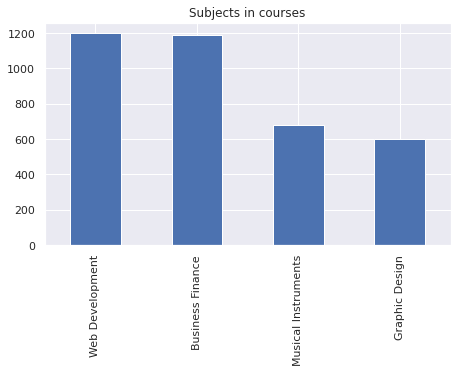

In [13]:
# Bar plot
plt.subplot(221)
data['subject'].value_counts().plot(kind='bar', title='Subjects in courses',figsize=(16,9))

Udemy provide maximum courses related to Web development (1200) and Minimum courses related to Graphic Design (603).

It means web development subject is more demanding in market.




### **3) What type of level courses Udemy provided to student?**

In [14]:
data.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

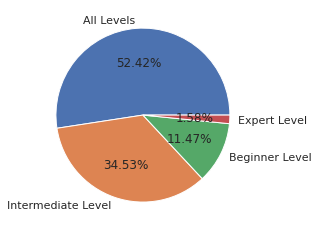

In [15]:
# Pie plot
plt.pie(data['level'].value_counts(), labels=data['level'].unique(), autopct='%1.2f%%')
plt.show()


By analyzing the figure above, we can see that Udemy provide maximum 52.45% "All level" of courses to student. 

Beginner level of courses are 11.45% which are minimum.

### **4) Show all the courses which are Free of Cost.**

In [16]:
data0=data[data.is_paid==False]
print("Number of free courses: ", data0.shape[0])
data0.head()

Number of free courses:  310


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23T22:19:57Z,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.50,2013-12-25T19:53:34Z,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,All Levels,1.00,2014-08-29T20:10:38Z,Business Finance
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,All Levels,2.00,2016-08-05T17:03:15Z,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,0,19339,794,9,Beginner Level,2.00,2014-03-31T21:35:06Z,Business Finance


### **5) Show all the courses which are Paid.**

In [17]:
data1=data[data.is_paid==True]
print("Number of paid courses: ",data1.shape[0])
data1.head()

Number of paid courses:  3362


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


<AxesSubplot:title={'center':'Paid or Unpaid Courses'}>

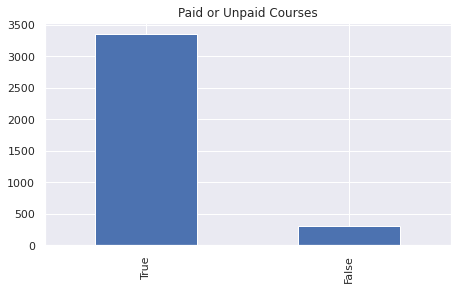

In [18]:
plt.subplot(221)
data['is_paid'].value_counts().plot(kind='bar', title='Paid or Unpaid Courses',figsize=(16,9))

In this dataset paid courses are 3368 and free courses 310.
It means Udemy provide maximum courses to student are paid.




### **6) List out all the courses that are related to 'SQL'.**

In [19]:
data2 = data[data.course_title.str.contains('SQL')]
print("Number of courses related to SQL : ",data2.shape[0])
data2

Number of courses related to SQL :  24


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2479,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5,2012-06-18T16:52:34Z,Web Development
2558,1070976,"Complete E-Commerce Course - Java,Spring,Hiber...",https://www.udemy.com/complete-e-commerce-cour...,True,195,1371,165,83,All Levels,20.0,2017-01-16T23:50:02Z,Web Development
2582,98066,Complete Website & CMS in PHP & MySQL From Scr...,https://www.udemy.com/cms-admin-panel-in-php-m...,True,20,3357,82,48,All Levels,12.5,2014-04-18T09:51:00Z,Web Development
2611,1171966,The Complete PHP MySQL Professional Course wit...,https://www.udemy.com/the-complete-php-mysql-p...,True,200,16158,159,125,All Levels,19.5,2017-06-07T05:58:36Z,Web Development
2622,992114,"Build A Complete CRUD Application With PHP, MY...",https://www.udemy.com/build-a-complete-crud-ap...,True,20,9762,94,112,All Levels,13.5,2016-11-01T15:30:36Z,Web Development
2635,266252,Projects in PHP and MySQL,https://www.udemy.com/the-complete-web-develop...,True,60,10606,570,88,All Levels,23.0,2014-07-25T11:11:41Z,Web Development
2639,1155262,Angular 2 Complete E-Commerce App Course - Jav...,https://www.udemy.com/build-angular-2-complete...,True,195,949,129,89,All Levels,20.5,2017-03-27T16:46:54Z,Web Development
2649,267560,Learn E-Commerce Website in PHP & MySQL From S...,https://www.udemy.com/ecommerce-website-in-php...,False,0,29990,1342,87,All Levels,17.5,2014-08-10T10:27:28Z,Web Development
2679,304490,A 13 Hour SQL Server 2014 /ASP.NET/CSS/C#/jQue...,https://www.udemy.com/learnsqlwithsqlserver2014/,True,35,4183,231,86,Intermediate Level,14.0,2014-10-12T06:29:05Z,Web Development
2748,978728,"Thoughtful Web Development Course: HTML, Vue.j...",https://www.udemy.com/web-development-html5-cs...,True,200,842,144,536,All Levels,25.0,2016-10-11T14:18:27Z,Web Development


---
### 3.4 Bivariate Analysis

* Here, we use two variables and compare them. This way, we can find how one feature affects the other. 

* It is done with scatter plots, which plot individual data points, or correlation matrices which plot the correlation in terms of hues. We can also plot box plots.

* We can do this either in a graphical way or in a non-graphical way by finding specific mathematical values in the data.

### **7) What are courses that were published in the year 2012?**

In [20]:
data.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

Here We can see that date column (published_timestamp) data type is object but to work on date time we need to date column as data type of date time data type.  

In [21]:
## Convert published_timestamp column data type 'object' to 'date time' data type.
data['published_timestamp']=pd.to_datetime(data.published_timestamp)
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [22]:
## Separate year from published_timestamp column and build a new column for year in dataset.
data['year']=data['published_timestamp'].dt.year
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016


In [23]:
data3=data[data.year==2012]
print("Number of courses published in 2012: ", data3.shape[0])
data3.head()

Number of courses published in 2012:  45


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
178,24877,Introductory Financial Accounting,https://www.udemy.com/introductory-financial-a...,True,80,1793,265,54,Beginner Level,10.0,2012-10-03 03:20:10+00:00,Business Finance,2012
409,28172,Practical Trading on Financial Futures & Optio...,https://www.udemy.com/getting-started-with-opt...,True,50,43,0,25,Beginner Level,4.0,2012-11-12 15:01:43+00:00,Business Finance,2012
416,24815,Harnessing the Power of Growth Stocks,https://www.udemy.com/harnessing-the-power-of-...,True,50,29,2,7,Intermediate Level,2.0,2012-10-31 01:05:18+00:00,Business Finance,2012
428,25794,How To Crowdfund,https://www.udemy.com/how-to-crowdfund/,True,30,43,6,17,All Levels,1.5,2012-10-02 22:00:03+00:00,Business Finance,2012
815,19653,Accounting Skills for Managers,https://www.udemy.com/accounting-skills-for-ma...,True,20,78,3,10,Beginner Level,1.5,2012-06-27 16:41:09+00:00,Business Finance,2012


### **8) Show all courses of Graphic Design where the price is below 50?**

In [24]:
data4=data[(data.subject == 'Graphic Design') & (data.price < 50)]
print(data4.shape)
data4.head()

(377, 13)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
1198,1219520,Adobe Illustrator T-Shirt Design for Merch by ...,https://www.udemy.com/merchbyamazondesign/,True,20,390,44,15,All Levels,1.0,2017-06-13 20:41:14+00:00,Graphic Design,2017
1203,317278,Typographic Logos: Typography and Lettering fo...,https://www.udemy.com/typographic-logos-typogr...,True,25,4235,427,20,Intermediate Level,1.5,2014-10-16 19:30:01+00:00,Graphic Design,2014
1204,573064,Photoshop in Ease: Create World Amazing Graph...,https://www.udemy.com/photoshop-knights-become...,True,20,14440,182,26,All Levels,3.0,2015-08-13 21:17:34+00:00,Graphic Design,2015
1207,590794,Illustrator Quick Tip：10分でKawaiiカメレオンを描こう,https://www.udemy.com/illustrator-quick-tip10k...,False,0,381,24,7,All Levels,0.6,2015-08-31 20:52:45+00:00,Graphic Design,2015
1208,1181578,Deinen Roman setzen mit PagePlus in 10 einfach...,https://www.udemy.com/deinen-roman-setzen-mit-...,False,0,69,6,25,All Levels,3.5,2017-04-24 16:44:12+00:00,Graphic Design,2017


Maximum price of udemy courses are 200 and 378 courses have price below 50.

### **9) how to vary number of subscribers with paid courses?**

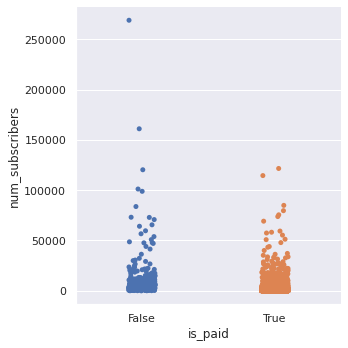

In [25]:
sns.catplot(x='is_paid', y='num_subscribers', data= data)

By analyzing the figure above, we can see that the number of subscribers is maximum for free courses than the paid courses. So, we can conclude that, there is a student’s preference for free of courses.



### **10) Subject prefered by  maximum number of students?**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

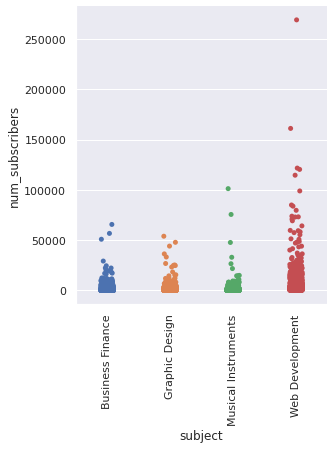

In [26]:
sns.catplot(x='subject', y='num_subscribers', data= data)
plt.xticks(rotation=90)

By analyzing the figure above, we can see that maximum number of students prefer web development subject.

### **11) How to vary price with subjects?**

Text(0.5, 0, 'price')

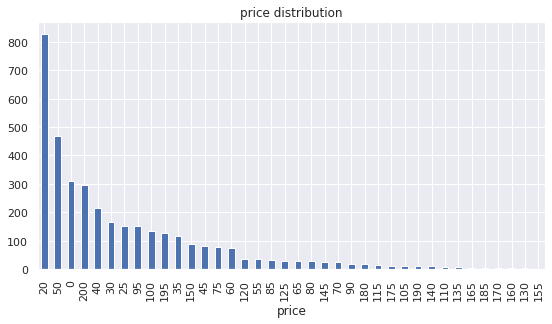

In [27]:
plt.subplot(221)
data['price'].value_counts().plot(kind='bar', title='price distribution',figsize=(20,10))
plt.xlabel('price')

This figure shows all the subjects have similar prices and price vary between 0 to 200. 

It means all subjects courses have moderate price and affordable by the students.

### **12) Which are Top Selling Courses?**

In [28]:
data5 = data.sort_values('num_subscribers', ascending=False)
data5.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,2013
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,2014
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016


'Learn HTML5 Programming from Scratch' course has maximum number of subscribers (268923). So, we can say that HTML5 programming is more demand in industry.

In [29]:
#to calculte revenue and sort
data5['revenue'] = data5['price']*data5['num_subscribers']
data5 = data5.sort_values('revenue', ascending=False)
data5.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,revenue
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016,22902400
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014,15099800
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development,2016,14018770
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development,2015,13932100



'Learn HTML5 Programming from Scratch' course has maximum number of subscribers (268923). But maximum revenue granted by web development course and Udemy provide maximum courses for web development subjects.



### **13) What is the Max. Number of Subscribers for Each Level of course?**

In [30]:
data.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [31]:
data.groupby('level')['num_subscribers'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

Text(0, 0.5, 'No of Subscribers')

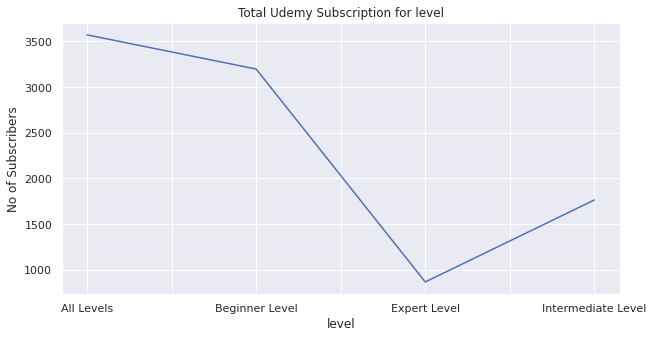

In [32]:
data.groupby('level')['num_subscribers'].mean().T.plot(figsize=(10,5))
plt.title('Total Udemy Subscription for level')
plt.ylabel('No of Subscribers')

### 14) Distribution of subscribers according to year

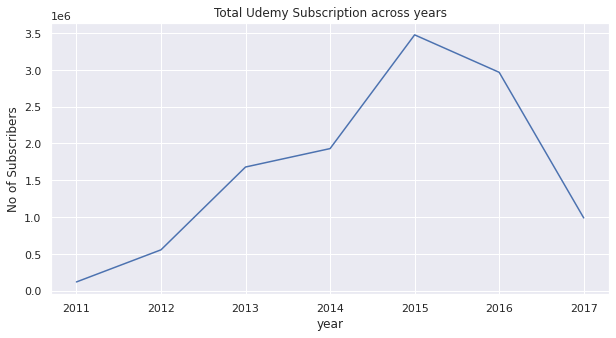

In [33]:
data5.groupby('year')['num_subscribers'].sum().plot(figsize=(10,5))
plt.title('Total Udemy Subscription across years')
plt.ylabel('No of Subscribers')
plt.show()

- The enrollment for Udemy courses is highest in year 2015.

### **15) which subject courses are launch every year?**

In [34]:
temp = data.groupby(['year','subject']).size().reset_index(name='Number of course')
df_WD = temp[temp['subject']=='Web Development']
df_BF = temp[temp['subject']=='Business Finance']
df_GD = temp[temp['subject']=='Graphic Design']
df_MI = temp[temp['subject']=='Musical Instruments']

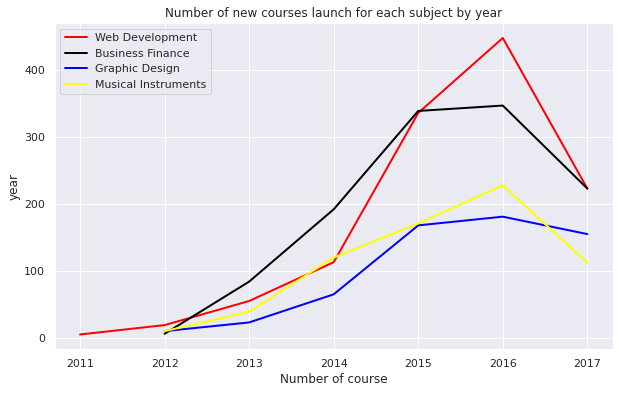

In [35]:
plt.figure(figsize=(10,6)) 
plt.plot(df_WD['year'], df_WD['Number of course'], label = "Web Development", color='red', linewidth=2)
plt.plot(df_BF['year'], df_BF['Number of course'], label = "Business Finance", color='black', linewidth=2)
plt.plot(df_GD['year'], df_GD['Number of course'], label = "Graphic Design", color='blue', linewidth=2)
plt.plot(df_MI['year'], df_MI['Number of course'], label = "Musical Instruments", color='yellow', linewidth=2)
plt.xlabel('Number of course')
# Set the y axis label of the current axis.
plt.ylabel('year')
# Set a title of the current axes.
plt.title('Number of new courses launch for each subject by year')
plt.legend()
plt.show()

This figure shows that every year all subject courses are launched by Udemy but in 2011 only web developemrnt courses are lanuched. 

## **4. Correlation Matrix**

•	A heat map is a two-dimensional representation of data in which values are represented by colors which provides a visual summary of information.

•	Heat map work with only numerical values.


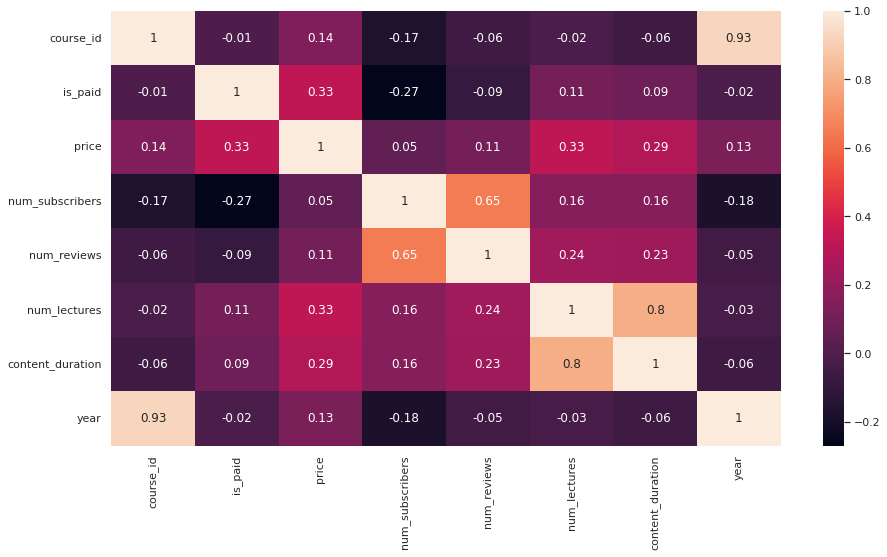

In [36]:
# heatmap of correlation values 
matrix = data.corr().round(2)
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True)
plt.show()

 By analyzing figure, we can see that number of lectures are highly correlated to content duration and number of subscribers also correlated to number of reviews.

# **5. Conclusion**

1) Udemy provide maximum courses for "web development" subjects and generate maximum revenue by this subject courses. Also have maximum number of subscribers for this subject.

2) Udemy provide all level of courses for student but beginner level of courses is less compared to intermediate and expert level course.

3) Udemy provide student to both paid and unpaid courses but maximum number of courses are paid. And courses price vary from 0 to 200

4) The maximum number of subscribers are for unpaid courses, it means price of courses are affecting student.


5) Udemy every year launched all subjects’ courses with same frequency.


